# Analyse de donnees bitcoin et serie temporelle

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
bitcoin = pd.read_csv('BTC-EUR.csv', index_col = 'Date', parse_dates = True) #on specifie que la colonne index est celle qui contient nos differentes
#dates, en ajoutant parse : on fait comprendre a pandas que la colonne index doit etre interprete comme etant une date

In [5]:
bitcoin.shape

(551, 6)

In [6]:
bitcoin.head()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2019-09-18  9253.401367  9316.917969  9240.340820  9246.486328  9246.486328   
2019-09-19  9248.524414  9319.454102  8917.574219  9292.973633  9292.973633   
2019-09-20  9292.886719  9334.069336  9194.604492  9239.483398  9239.483398   
2019-09-21  9241.304688  9245.341797  9075.292969  9092.541992  9092.541992   
2019-09-22  9096.534180  9142.628906  9004.768555  9138.951172  9138.951172   

                  Volume  
Date                      
2019-09-18  1.466026e+10  
2019-09-19  1.804724e+10  
2019-09-20  1.337076e+10  
2019-09-21  1.218296e+10  
2019-09-22  1.197878e+10

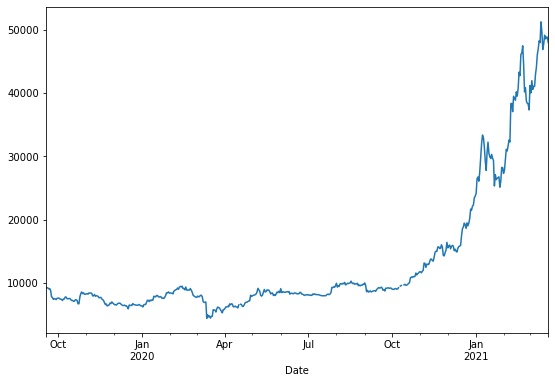

In [7]:
bitcoin['Close'].plot(figsize = (9, 6))
plt.show()

In [8]:
bitcoin.index #ici pandas l'a bien compris et on peut maintenant travailler plus tranquillement sur les Timeseries

DatetimeIndex(['2019-09-18', '2019-09-19', '2019-09-20', '2019-09-21',
               '2019-09-22', '2019-09-23', '2019-09-24', '2019-09-25',
               '2019-09-26', '2019-09-27',
               ...
               '2021-03-12', '2021-03-13', '2021-03-14', '2021-03-15',
               '2021-03-16', '2021-03-17', '2021-03-18', '2021-03-19',
               '2021-03-20', '2021-03-21'],
              dtype='datetime64[ns]', name='Date', length=551, freq=None)

Pour avoir un index de type **DateTime**

- index_col = 'Date'
- parse_dates = True

On souhaite faire un graphique sur l'annee 2019

<AxesSubplot:xlabel='Date'>

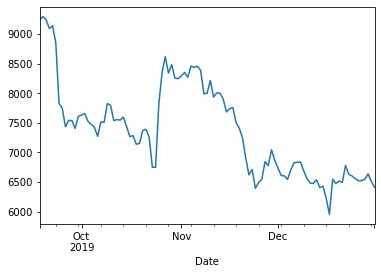

In [9]:
bitcoin['2019']['Close'].plot() #evolution du bitcoin en 2019

<AxesSubplot:xlabel='Date'>

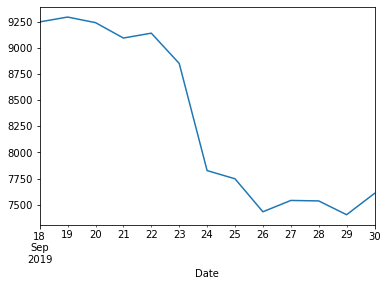

In [10]:
bitcoin['2019-09']['Close'].plot() #evolution du bitcoin en septembre 2019

<AxesSubplot:xlabel='Date'>

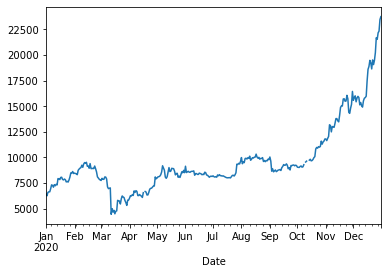

In [11]:
bitcoin['2020']['Close'].plot() #evolution du bitcoin en 2020

<AxesSubplot:xlabel='Date'>

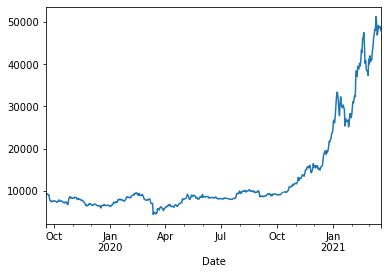

In [12]:
#bitcoin['2019':'2020']['Close'].plot() #evolution du bitcoin entre 2019 et 2020
bitcoin.loc['2019':'2021']['Close'].plot() #evolution du bitcoin entre 2019 et 2021

# RESAMPLE

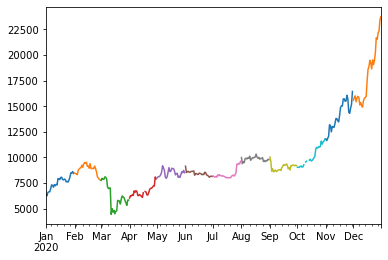

In [13]:
bitcoin.loc['2020','Close'].resample('M').plot() #On regroupe nos donnees par Mois
plt.show()

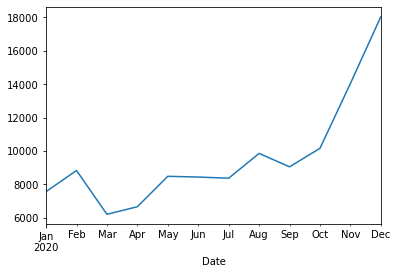

In [14]:
bitcoin.loc['2020','Close'].resample('M').mean().plot() #L'evolution du bitcoin en 2020 en faisant la moyenne sur chaque mois
plt.show()

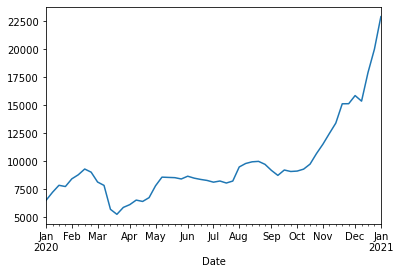

In [15]:
bitcoin.loc['2020','Close'].resample('W').mean().plot() #L'evolution du bitcoin en 2020 en faisant la moyenne 
#sur chaque Semaine
plt.show()

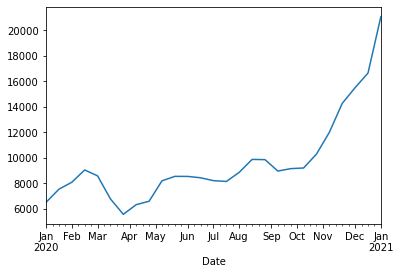

In [16]:
bitcoin.loc['2020','Close'].resample('2W').mean().plot() #L'evolution du bitcoin en 2020 en faisant la moyenne 
#sur chaque 2 Semaine
plt.show()

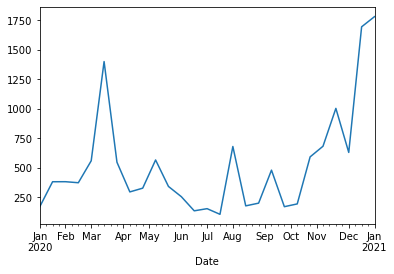

In [17]:
bitcoin.loc['2020','Close'].resample('2W').std().plot() #On voit quand 2020, le bitcoin a ete tres volatile et pas du stable
#cela s'explique par la crise sanitaire du covid-19
plt.show()

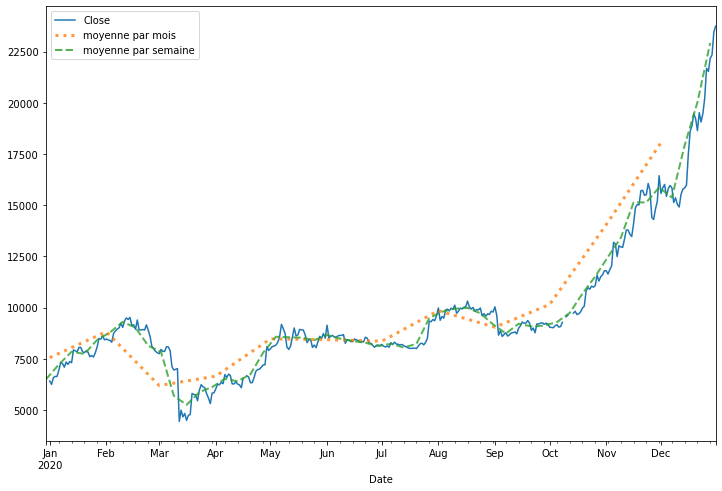

In [18]:
plt.figure(figsize = (12, 8))
bitcoin.loc['2020','Close'].plot()
bitcoin.loc['2020','Close'].resample('M').mean().plot(label = 'moyenne par mois', lw = 3, ls = ':', alpha = 0.8)
bitcoin.loc['2020','Close'].resample('W').mean().plot(label = 'moyenne par semaine', lw = 2, ls = '--', alpha = 0.8)
plt.legend()
plt.show()

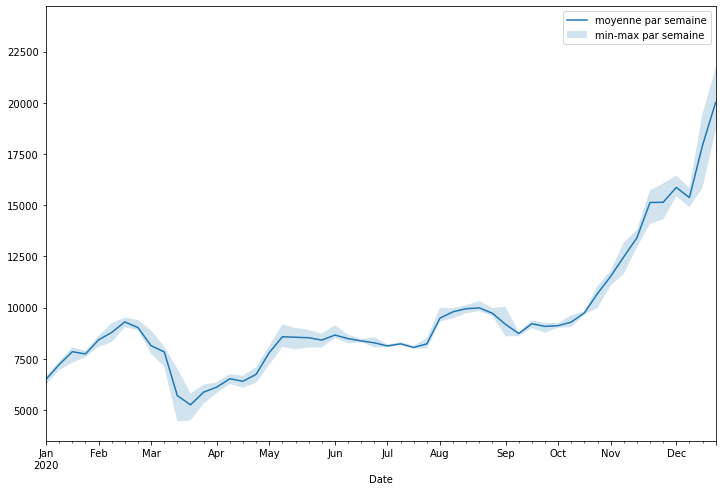

In [19]:
m = bitcoin.loc['2020','Close'].resample('W').agg(['mean','std','min','max'])

plt.figure(figsize = (12, 8))
m['mean']['2020'].plot(label = 'moyenne par semaine')
plt.fill_between(m.index, m['max'], m['min'], alpha = 0.2, label = 'min-max par semaine')

plt.legend()
plt.show()

# MOVING AVERAGE

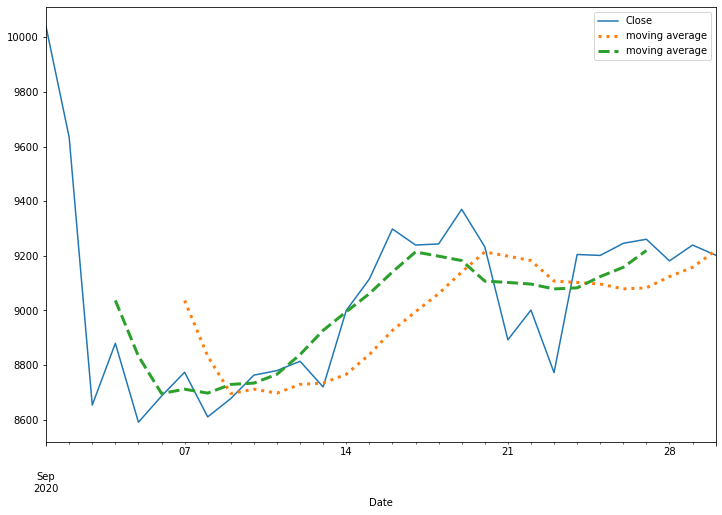

In [20]:
plt.figure(figsize = (12, 8))
bitcoin.loc['2020-09','Close'].plot() # valeur 'close' a l'instant t
bitcoin.loc['2020-09','Close'].rolling(window = 7).mean().plot(label = 'moving average', lw = 3, ls = ':')
bitcoin.loc['2020-09','Close'].rolling(window = 7, center = True).mean().plot(label = 'moving average', lw = 3, ls = '--')

plt.legend()
plt.show()

# Exponential Weighted Function

Une moyenne mobile exponentielle

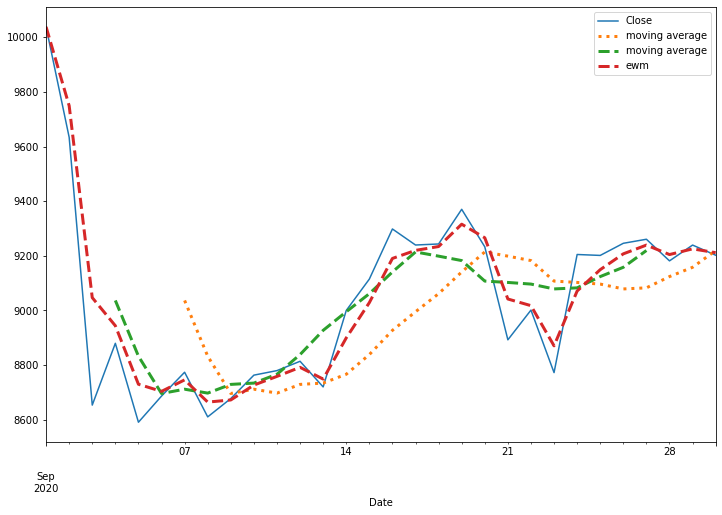

In [21]:
plt.figure(figsize = (12, 8))
bitcoin.loc['2020-09','Close'].plot() # valeur 'close' a l'instant t
bitcoin.loc['2020-09','Close'].rolling(window = 7).mean().plot(label = 'moving average', lw = 3, ls = ':')
bitcoin.loc['2020-09','Close'].rolling(window = 7, center = True).mean().plot(label = 'moving average', lw = 3, ls = '--')
bitcoin.loc['2020-09','Close'].ewm(alpha = 0.6).mean().plot(label = 'ewm', lw = 3, ls = '--') #ewm suit beaucoup plus
#mieux la tendance du bitcoin que nos movings averages
plt.legend()
plt.show()

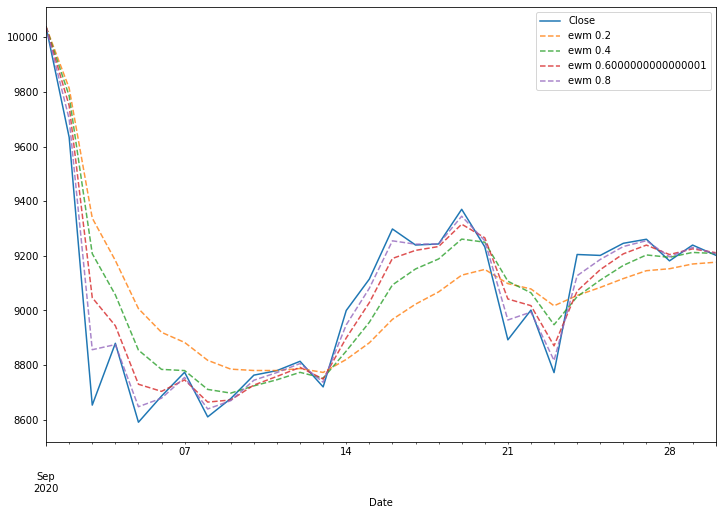

In [22]:
plt.figure(figsize = (12, 8))
bitcoin.loc['2020-09','Close'].plot() # valeur 'close' a l'instant t

for i in np.arange(0.2, 1, 0.2):
    bitcoin.loc['2020-09','Close'].ewm(alpha = i).mean().plot(label = f'ewm {i}', ls = '--', alpha = 0.8)
    
plt.legend()
plt.show()

# Assamblage des donnees

In [23]:
ethereum = pd.read_csv('ETH-EUR.csv', index_col = 'Date', parse_dates = True)

In [24]:
ethereum.shape

(551, 6)

In [25]:
ethereum.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2019-09-18  187.862411  196.486679  188.634079  191.664566  191.664566   
2019-09-19  191.532379  201.739441  185.277878  200.299454  200.299454   
2019-09-20  200.108246  201.092926  195.249847  197.872787  197.872787   
2019-09-21  197.734238  200.511932  195.105133  195.573410  195.573410   
2019-09-22  195.546509  196.099777  188.439224  191.978912  191.978912   

                  Volume  
Date                      
2019-09-18  8.336536e+09  
2019-09-19  9.613097e+09  
2019-09-20  7.285106e+09  
2019-09-21  7.026783e+09  
2019-09-22  7.090220e+09

In [26]:
ethereum.index

DatetimeIndex(['2019-09-18', '2019-09-19', '2019-09-20', '2019-09-21',
               '2019-09-22', '2019-09-23', '2019-09-24', '2019-09-25',
               '2019-09-26', '2019-09-27',
               ...
               '2021-03-12', '2021-03-13', '2021-03-14', '2021-03-15',
               '2021-03-16', '2021-03-17', '2021-03-18', '2021-03-19',
               '2021-03-20', '2021-03-21'],
              dtype='datetime64[ns]', name='Date', length=551, freq=None)

<AxesSubplot:xlabel='Date'>

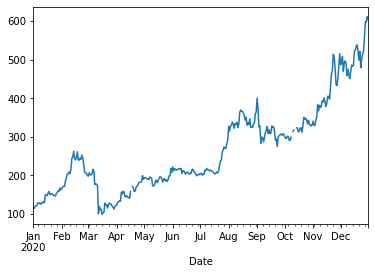

In [27]:
ethereum['2020']['Close'].plot()

In [28]:
pd.merge(bitcoin, ethereum, on = 'Date', how = 'inner') #les suffixes x et y correspondent a x pour bitcoin et y pour ethereum

Open_x        High_x         Low_x       Close_x  \
Date                                                                 
2019-09-18   9253.401367   9316.917969   9240.340820   9246.486328   
2019-09-19   9248.524414   9319.454102   8917.574219   9292.973633   
2019-09-20   9292.886719   9334.069336   9194.604492   9239.483398   
2019-09-21   9241.304688   9245.341797   9075.292969   9092.541992   
2019-09-22   9096.534180   9142.628906   9004.768555   9138.951172   
...                  ...           ...           ...           ...   
2021-03-17  47744.664063  49206.125000  45834.093750  49129.878906   
2021-03-18  49148.394531  50395.453125  45520.597656  48546.066406   
2021-03-19  48538.949219  49977.863281  47535.960938  48839.941406   
2021-03-20  48827.894531  50250.089844  48728.312500  48812.308594   
2021-03-21  48485.988281  49181.714844  47732.230469  47957.828125   

             Adj Close_x      Volume_x       Open_y       High_y        Low_y  \
Date                                                                            
2019-09-18   9246.486328  1.466026e+10   187.862411   196.486679   188.634079   
2019-09-19   9292.973633  1.804724e+10   191.532379   201.739441   185.277878   
2019-09-20   9239.483398  1.337076e+10   200.108246   201.092926   195.249847   
2019-09-21   9092.541992  1.218296e+10   197.734238   200.511932   195.105133   
2019-09-22   9138.951172  1.197878e+10   195.546509   196.099777   188.439224   
...                  ...           ...          ...          ...          ...   
2021-03-17  49129.878906  5.028773e+10  1518.276001  1535.834961  1470.138550   
2021-03-18  48546.066406  4.677327e+10  1521.491333  1544.560425  1430.526123   
2021-03-19  48839.941406  4.106965e+10  1495.650024  1546.610229  1465.657959   
2021-03-20  48812.308594  4.215604e+10  1521.384644  1569.253296  1516.534668   
2021-03-21  47957.828125  4.649877e+10  1503.595459  1525.839355  1486.673462   

                Close_y  Adj Close_y      Volume_y  
Date                                                
2019-09-18   191.664566   191.664566  8.336536e+09  
2019-09-19   200.299454   200.299454  9.613097e+09  
2019-09-20   197.872787   197.872787  7.285106e+09  
2019-09-21   195.573410   195.573410  7.026783e+09  
2019-09-22   191.978912   191.978912  7.090220e+09  
...                 ...          ...           ...  
2021-03-17  1521.734131  1521.734131  2.045691e+10  
2021-03-18  1495.890381  1495.890381  1.951934e+10  
2021-03-19  1521.469482  1521.469482  1.778704e+10  
2021-03-20  1517.292969  1517.292969  1.898269e+10  
2021-03-21  1492.796021  1492.796021  2.136948e+10  

[551 rows x 12 columns]

In [29]:
btc_eth = pd.merge(bitcoin, ethereum, on = 'Date', how = 'inner', suffixes = ('_btc', '_eth')) #on modifie les suffixes x et y, on peut
#aussi utiliser how = 'outer'

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

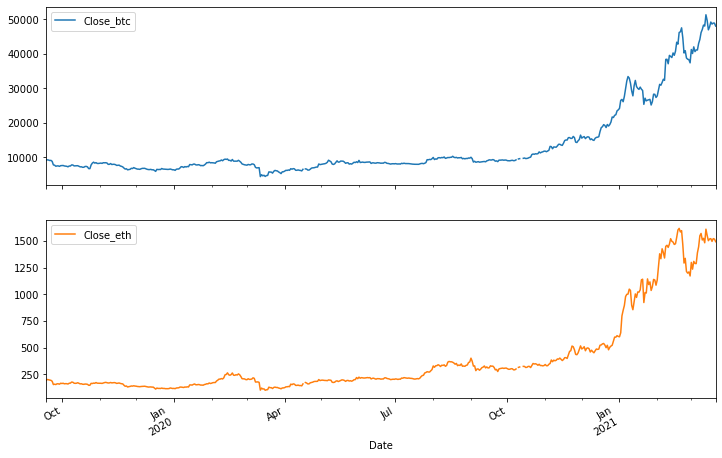

In [30]:
btc_eth[['Close_btc','Close_eth']].plot(subplots = True, figsize = (12, 8))

In [31]:
#On souhaite calculer la correlation existant entre le bitcoin et l'ethereum

correlations = btc_eth[['Close_btc','Close_eth']].corr() #on observe une correlation de 98 % et ceci est tres eleve
correlations

Close_btc  Close_eth
Close_btc   1.000000   0.983292
Close_eth   0.983292   1.000000

<AxesSubplot:>

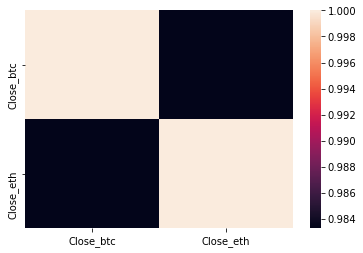

In [32]:
import seaborn as sns
sns.heatmap(correlations)

<AxesSubplot:xlabel='Date'>

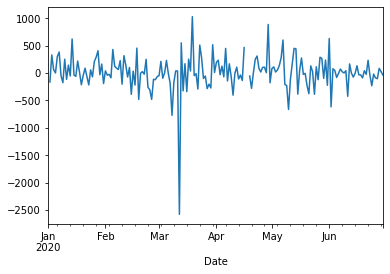

In [33]:
bitcoin['Close']['2020-01':'2020-06'].diff().plot()

# Strategie de la tourtue

Comment proceder ?

1. Utiliser rolling() pour calculer :
    - max sur les 28 derniers jours
    - min sur les 28 derniers jours

2. Boolean indexing :
    - Si 'Close' > max28 alors Buy = 1
    - Si 'Close' < min28 alors Sell = -1

In [34]:
#%matplotlib

In [35]:
data = bitcoin.copy()
data['Buy'] = np.zeros(len(data))
data['Sell'] = np.zeros(len(data))

In [36]:
data['RollingMax'] = data['Close'].shift(1).rolling(window = 28).max()
data['RollingMin'] = data['Close'].shift(1).rolling(window = 28).min()

data.loc[data['RollingMax'] < data['Close'], 'Buy'] = 1
data.loc[data['RollingMin'] > data['Close'], 'Sell'] = -1

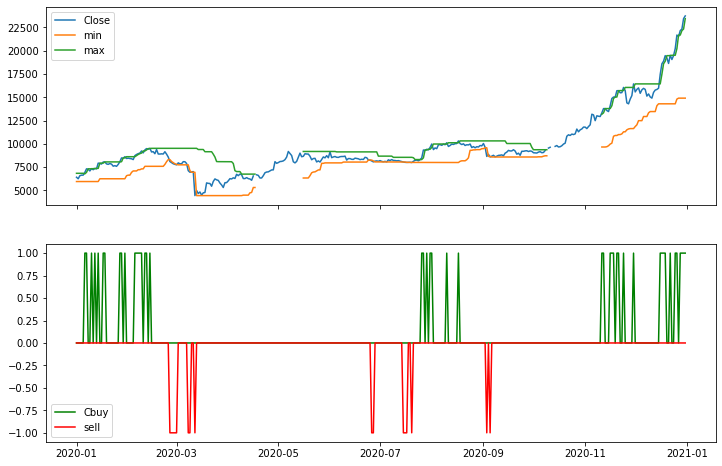

In [37]:
start = '2020'
end = '2020'

fig, ax = plt.subplots(2, figsize = (12, 8), sharex = True)

ax[0].plot(data['Close'][start:end])
ax[0].plot(data['RollingMin'][start:end])
ax[0].plot(data['RollingMax'][start:end])
ax[0].legend(['Close', 'min', 'max'])
ax[1].plot(data['Buy'][start:end], c = 'g')
ax[1].plot(data['Sell'][start:end], c = 'r')
ax[1].legend(['Cbuy', 'sell'])